In [3]:
import matplotlib.pyplot as plt
import pandas as pd

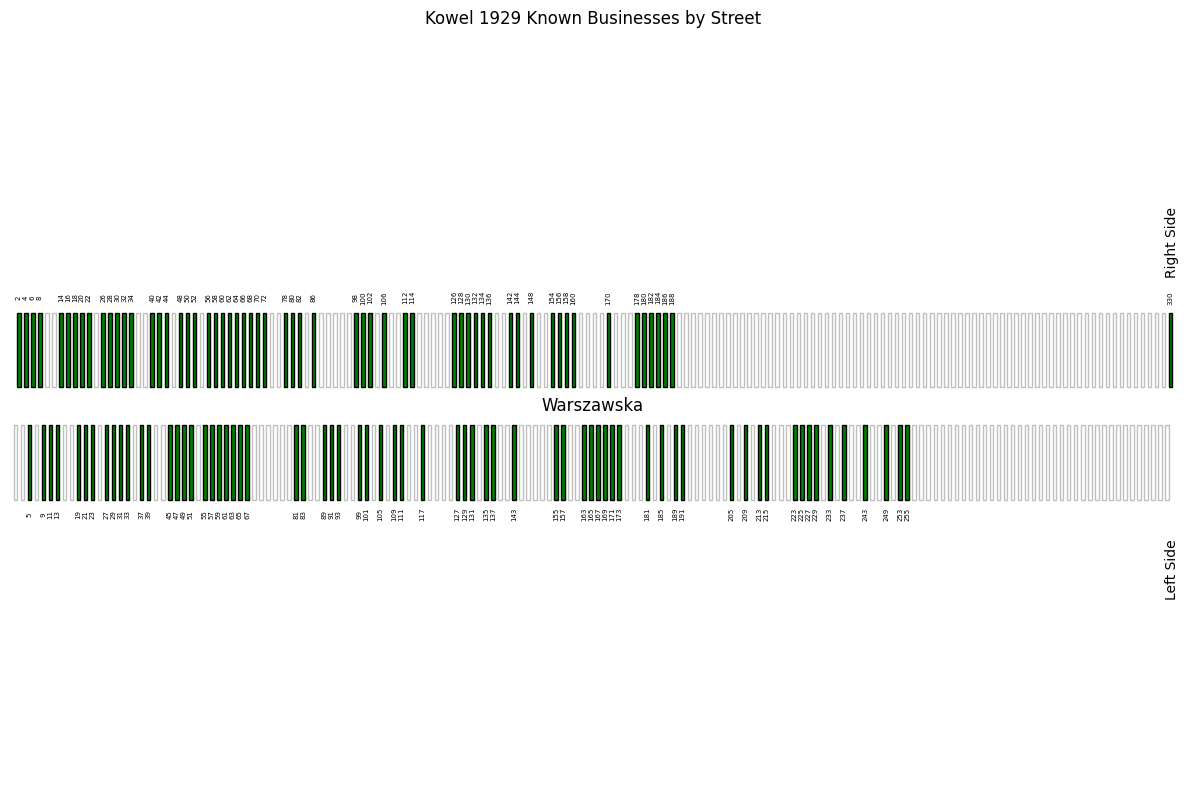

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

def csv_to_dataframe(path):
    try:
        return pd.read_csv(path)
    except Exception as ee:
        print(ee)

def data_frame_with_specific_street_in_address_column(df: pd.DataFrame, street_name='Warszawska'):
    df_filtered = df[df['Address'].str.contains(street_name, case=False, na=False)].copy()
    df_filtered['Building Number'] = df_filtered['Address'].str.extract(r'(\d+)').astype(float)
    return df_filtered

def plot_street_view(data: pd.DataFrame, street_name='Warszawska'):
    fig, ax = plt.subplots(figsize=(12, 8))

    street_width = 0.05
    building_width = 0.1 

    empty_building_color = 'white'
    business_building_color = 'green'

    max_building_number = int(data['Building Number'].max())

    for i in range(1, max_building_number + 1):
        if i % 2 == 0:  # Even numbers (top side)
            y = 0.5 + street_width / 2
            label_y = y + building_width + 0.02  # Additional offset to move the label further from the buildings
        else:  # Odd numbers (bottom side)
            y = 0.5 - street_width / 2 - building_width
            label_y = y - 0.02  # A small offset to position the label just below the building

        if i in data['Building Number'].values:
            building_color = business_building_color
            ax.add_patch(plt.Rectangle((i, y), 1, building_width, facecolor=building_color, edgecolor='black', alpha=1))
            ax.text(i + 0.5, label_y, str(int(i)), ha='center', va='center', fontsize=5, color='black', rotation=90)
        else:
            building_color = empty_building_color
            ax.add_patch(plt.Rectangle((i, y), 1, building_width, facecolor=building_color, edgecolor='black', alpha=0.25))

    ax.text((max_building_number + 2) / 2, 0.5, street_name, ha='center', va='center', fontsize=12)

    right_side_label_y = 0.5 + street_width / 2 + building_width + 0.05
    left_side_label_y = 0.5 - street_width / 2 - building_width - 0.13

    ax.text(max_building_number + 1, left_side_label_y, "Left Side", ha='center', rotation=90)
    ax.text(max_building_number + 1, right_side_label_y, "Right Side", ha='center', rotation=90)

    ax.set_ylim(0, 1)
    ax.set_xlim(0, max_building_number + 2)
    ax.axis('off')
    ax.set_title("Kowel 1929 Known Businesses by Street")

    plt.tight_layout()
    plt.show()

input_data = csv_to_dataframe('population.csv')
df_filtered = data_frame_with_specific_street_in_address_column(input_data)
plot_street_view(df_filtered)




